## K-NN Regression
- 임의의 수치를 예측하는 문제
- 두 변수 사이의 상관관계를 분석

### Practice
- Scatterplot analysis
- Using numpy array
- Using `train_test_split()`
- Using `reshape()`
- Using KNeighborsRegressor
- Coefficient of Determination
- Using sklearn.metrics and MAE(Mean Absolute Error)
- Using sklearn.metrics and MSE(Mean Squred Error)
- What are Overfitting and Underfitting?

### 1. Import numpy

In [ ]:
import numpy as np

### 2. Prepare to numerical data of numpy arrays

In [ ]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

### 3. Draw a Scatterplot for np arrays analysis

In [ ]:
import matplotlib.pyplot as plt

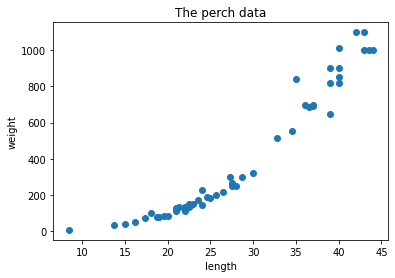

In [ ]:
plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.title("The perch data")
plt.show() 
#Then, Increase a length == Increase a weight

### 4. Create Train-set and Test-set to using **`train_test_split()`**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

### 5. Convert a 1-dimensional array to a 2-dimensional array
- 기존에 활용한 데이터는 특성이 두개였기 때문에 자연스럽게 2차원 배열을 사용
- sklearn 훈련 세트를 사용하기 위해서 1차원 배열이 아닌 2차원 배열이 필요
- 해당 데이터는 특성이 하나이기 때문에 비어있는 열을 하나 추가 

In [ ]:
#Checkout
print(train_input)
print(test_input)
print(train_target)
print(test_target)
# Conversion required

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]
[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]
[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]
[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


### 5-1. Using **`.reshape(_columnNumber, _rowNumber)`**

- 지정한 배열의 크기로 새로운 배열을 반환
- 원본 배열의 원소 수와 새로운 배열의 원소 수는 일치해야함
- 배열의 크기에 -1을 지정하면 나머지 원소로 모두 채울 수 있음

In [ ]:
#Checkout
print(train_input.shape)
print(test_input.shape)

(42,)
(14,)


In [ ]:
train_input = train_input.reshape(-1, 1) #(42,) -> (42, 1)
test_input = test_input.reshape(-1, 1) #(14,) -> (14, 1)
#Checkout
print(train_input.shape)
print(test_input.shape)

(42, 1)
(14, 1)


### 6. Using KNeighborsRegressor
- KNeighborsRegressor 클래스 사용을 위해 module import

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

### 7. Start to fit

In [ ]:
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [ ]:
knr.score(test_input, test_target) #Something is wrong

0.992809406101064

### 8. Why are the accuracy figures strange?
- 분류가 아닌 회귀에선 정확하게 수치를 맞춘다는 것은 거의 불가능
  - **예측하는 수치 또는 타겟 모두 임의의 수치이기 때문**
- 분류와 다르게 회귀는 결정계수를 통해 수치를 평가

### 8-1. Coefficient of determination
- 회귀 문제의 평가 지표 역할
- 각 샘플의 타겟과 예측치의 차를 제곱해 합한 결과를 각 샘플의 타겟과 타겟의 평균 차를 제곱하여 합한 결과로 나눈 값을 1에서 뺀 값
  - 타겟의 평균 정도를 예측하면 0에 가까워지고, 예측이 타겟과 가까우면 1에 가까워짐
- 분류의 정확도처럼 직관적인 결과가 나타나지 않음



### 8-2. Import sklearn.metrics
- 해당 모듈을 통해 MAE 사용이 가능하다

In [ ]:
from sklearn.metrics import mean_absolute_error

### 8-3. Use a **`mean_absolute_error(_target, _prediction)`**
- $$MAE={1\over n}\sum_{i=1}^n|x_{i}−x|$$
- 예측값과 실제값 사이의 절대 오차값을 모두 구한다
- 절대 오차값을 모두 더해 오차의 개수로 나눈다

In [ ]:
#Create a predictions for test sets
test_prediction = knr.predict(test_input)
#Mean absolute value error for test set
mae = mean_absolute_error(test_target, test_prediction)
#Checkout
print(mae)

19.157142857142862


### 8-4. Use a **`mean_squared_error(_target, _prediction)`**
- $$MSE={1\over n}\sum_{i=1}^n(x_{i}−x_{i})^2$$
- 정확도 측정을 위해 사용
- MAE와 다르게 절대 오차가 아닌 오차의 제곱에 대한 평균을 구한다.

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
#Mean squared value error for test set
mse = mean_squared_error(test_target, test_prediction)
#Checkout
print(mse)

721.7385714285714


### 9. What are Overfitting and Underfitting?
- Train-set 보다 Test-set의 평가 수치가 낮은 경우 **과대적합**
- Train-set 보다 Test-set 평가 수치가 너무 높거나 모두 낮은 경우 **과소적합**
  - 보통 Train set, Test set 모두 크기가 매우 작으면 **과소적합** 발생

In [22]:
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9698823289099254
0.992809406101064


### 9-1. Solution to underfitting
- 모델을 복잡하게 설계
- 최근접 이웃 알고리즘에 한해 이웃의 개수를 줄이면 우선 문제 해결이 가능
- `n_neighbors()` 속성 값 변경으로 이를 해결

In [23]:
#default = 5
knr.n_neighbors = 3

#restart to fit
knr.fit(train_input, train_target)

#Checkout
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609
